# Neural Arithmetic Logic Unit

This notebook contains basic experiments with the NAC and NALU activation units. We attempt to reproduce results relating to basic arithmetic functions found in [arXiv:1808.00508](https://arxiv.org/abs/1808.00508).

In [1]:
import keras as k
from keras.models import *
import keras.backend as K

C:\Users\acyrl\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import nalu.GenData as gd

In [3]:
from nalu.NALU import NALU
from nalu.NAC import NAC

In [4]:
def pred_close(y_true, y_pred):
    return K.abs(y_true - y_pred) < 1e-4

## Idendity

### NAC


We generate data in the way described in the paper. See gd.gd_paper for more details

In [67]:
_, Y = gd.gd_paper(size=100000)

In [71]:
x = Input((1,)) 
y = NAC(1)(x)
nac_identity_model = Model(x, y)
nac_identity_model.compile(k.optimizers.RMSprop(lr=0.01), "mse", metrics=[pred_close])
nac_identity_model.fit(Y, Y, batch_size=20, epochs=10)

Epoch 1/10
100000/100000 [==============================] - 7s 70us/step - loss: 1436.6143 - pred_close: 0.5686
Epoch 2/10
100000/100000 [==============================] - 7s 67us/step - loss: 4.8323e-10 - pred_close: 1.0000
Epoch 3/10
100000/100000 [==============================] - 7s 66us/step - loss: 4.8323e-10 - pred_close: 1.0000
Epoch 4/10
100000/100000 [==============================] - 7s 67us/step - loss: 5.0542e-11 - pred_close: 1.0000
Epoch 5/10
100000/100000 [==============================] - 7s 66us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 6/10
100000/100000 [==============================] - 7s 66us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 7/10
100000/100000 [==============================] - 7s 65us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 8/10
100000/100000 [==============================] - 7s 68us/step - loss: 0.0000e+00 - pred_close: 1.0000
Epoch 9/10
100000/100000 [==============================] - 7s 68us/step - loss: 0.0000e+00 - pre

In [74]:
_, Yext = gd.gd_uniform(20,25, size=50000)
nac_identity_model.evaluate(Yext, Yext)

50000/50000 [==============================] - 1s 18us/step


[0.0, 1.0]

In [69]:
nac_identity_model.get_weights()

[array([[9.0115595]], dtype=float32), array([[16.635534]], dtype=float32)]

### NALU

In [83]:
x = Input((1,)) # n is the dimension of the data, (n, N)
y = NALU(1)(x) # number of units, but let's test
m = Model(x, y)
nalu_identity_model.compile(k.optimizers.RMSprop(lr=0.01), "mse", metrics=[pred_close])
nalu_identity_model.fit(Y, Y, batch_size=20, epochs=10)

Epoch 1/10
100000/100000 [==============================] - 8s 81us/step - loss: 263.5022 - pred_close: 0.6269
Epoch 2/10
100000/100000 [==============================] - 8s 79us/step - loss: 4.8323e-10 - pred_close: 1.0000
Epoch 3/10
100000/100000 [==============================] - 8s 77us/step - loss: 4.8323e-10 - pred_close: 1.0000
Epoch 4/10
100000/100000 [==============================] - 8s 78us/step - loss: 2.1834e-11 - pred_close: 1.0000
Epoch 5/10
100000/100000 [==============================] - 8s 78us/step - loss: 2.2703e-18 - pred_close: 1.0000
Epoch 6/10
100000/100000 [==============================] - 8s 78us/step - loss: 2.2703e-18 - pred_close: 1.0000
Epoch 7/10
100000/100000 [==============================] - 8s 82us/step - loss: 2.2703e-18 - pred_close: 1.0000
Epoch 8/10
100000/100000 [==============================] - 8s 80us/step - loss: 2.2703e-18 - pred_close: 1.0000
Epoch 9/10
100000/100000 [==============================] - 8s 78us/step - loss: 2.2703e-18 - pred

In [88]:
_, Yext = gd.gd_uniform(20000,20010, size=50000)
nalu_identity_model.evaluate(Yext, Yext)


50000/50000 [==============================] - 1s 20us/step


[0.0, 1.0]

In [85]:
nalu_identity_model.get_weights()

[array([[9.010963]], dtype=float32),
 array([[16.63558]], dtype=float32),
 array([[1.2087377]], dtype=float32)]



No surprise that both of these units can learn the identity function.

## Addition

We now turn our attention to additive operation. 

We will study its error as 
### NAC

In [90]:
X, Y = gd.gd_paper(size=100000)

In [99]:
x = Input((2,)) # n is the dimension of the data, (n, N)
y = NALU(1)(x) # number of units, but let's test

nac_add_model = Model(x, y)
nac_add_model.compile(k.optimizers.RMSprop(lr=0.01), "mse", metrics=[pred_close])
nac_add_model.fit(X, Y, batch_size=20, epochs=50)

Epoch 1/50
100000/100000 [==============================] - 9s 89us/step - loss: 318.5997 - pred_close: 0.5605
Epoch 2/50
100000/100000 [==============================] - 9s 92us/step - loss: 9.6447e-07 - pred_close: 0.9986
Epoch 3/50
100000/100000 [==============================] - 9s 86us/step - loss: 4.9629e-07 - pred_close: 0.9995
Epoch 4/50
100000/100000 [==============================] - 9s 88us/step - loss: 3.1106e-07 - pred_close: 0.9996
Epoch 5/50
100000/100000 [==============================] - 8s 83us/step - loss: 2.2149e-07 - pred_close: 0.9996
Epoch 6/50
100000/100000 [==============================] - 8s 84us/step - loss: 1.8482e-07 - pred_close: 0.9997
Epoch 7/50
100000/100000 [==============================] - 9s 88us/step - loss: 1.4935e-07 - pred_close: 0.9997
Epoch 8/50
100000/100000 [==============================] - 9s 88us/step - loss: 1.2558e-07 - pred_close: 0.9997
Epoch 9/50
100000/100000 [==============================] - 10s 96us/step - loss: 1.0639e-07 - pre

#### Interpolation:


In [106]:
nac_add_Xint, nac_add_Yint = gd.gd_paper(size=50000)
nac_add_model.evaluate(nac_add_Xint, nac_add_Yint)

50000/50000 [==============================] - 1s 22us/step


[1.1799793327327279e-10, 0.99998]

In [111]:
nac_add_Xint_unif, nac_add_Yint_unif = gd.gd_uniform(size=50000)
nac_add_model.evaluate(nac_add_Xint_unif, nac_add_Yint_unif)

50000/50000 [==============================] - 1s 23us/step


[9.76707819725391e-07, 0.98424]

There seems to be some overfitting to the way the data is generated. We should investigate its distribution.

#### Extrapolation

Here we will looks at outside the range of where the model was trained. Moreover, we will look at the behaviour of the error as we extrapolate further from the training range.

In [129]:
nac_add_Xext, nac_add_Yext = gd.gd_paper(10, 20, size=50000)
nac_add_model.evaluate(nac_add_Xext, nac_add_Yext)

50000/50000 [==============================] - 1s 22us/step


[2.0385595416883005e-09, 0.90164]

In [128]:
nac_add_Xext_unif, nac_add_Yext_unif = gd.gd_uniform(100, 101, size=50000)
nac_add_model.evaluate(nac_add_Xext_unif, nac_add_Yext_unif)

50000/50000 [==============================] - 1s 22us/step


[5.798880010843277e-11, 1.0]

We can investigate what happens we extrapolate. We will look at ever increasing of intervals of size.

In [138]:
nac_add_Xext_unif, nac_add_Yext_unif = gd.gd_uniform(10000, 10005, size=50000)
nac_add_model.evaluate(nac_add_Xext_unif, nac_add_Yext_unif)

50000/50000 [==============================] - 1s 21us/step


[9.552764892578124e-07, 0.74958]

In [153]:
import pandas as pd
plot_data = pd.DataFrame(data={'index': [], 'loss':[], 'pred_close':[]})

In [154]:
N = 10000
for i in range(1, 500):
    if not i % 20:
        print("iteration {0}/{1}".format(i, N))
    Xtest, Ytest = gd.gd_uniform(i*10, (i+1)*10-1, size=5000)
    nac_loss, nac_pred_close = nac_add_model.evaluate(Xtest, Ytest, verbose=0)
    plot_data = pd.concat([plot_data, pd.DataFrame({'index':[i*10], 'loss':[nac_loss], 'pred_close':[nac_pred_close]})])

5000/5000 [==============================] - 0s 22us/step
iteration 20/10000
5000/5000 [==============================] - 0s 22us/step
iteration 40/10000
5000/5000 [==============================] - 0s 22us/step
iteration 60/10000
5000/5000 [==============================] - 0s 23us/step
iteration 80/10000
5000/5000 [==============================] - 0s 22us/step
iteration 100/10000
5000/5000 [==============================] - 0s 21us/step
iteration 120/10000
5000/5000 [==============================] - 0s 22us/step
iteration 140/10000
5000/5000 [==============================] - 0s 22us/step
iteration 160/10000
5000/5000 [==============================] - 0s 23us/step
iteration 180/10000
5000/5000 [==============================] - 0s 23us/step
iteration 200/10000
5000/5000 [==============================] - 0s 22us/step
iteration 220/10000
5000/5000 [==============================] - 0s 23us/step
iteration 240/10000
5000/5000 [==============================] - 0s 24us/step
iteration 

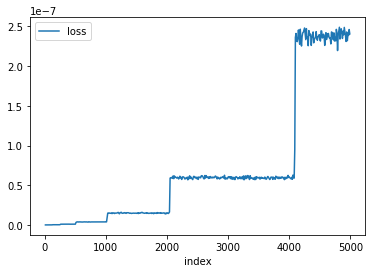

In [155]:
plot_data.plot(x='index', y='loss')

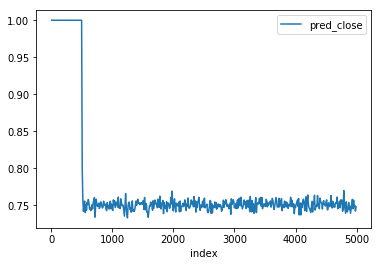

In [156]:
plot_data.plot(x='index', y='pred_close')